In [ ]:
#First we import and load all basic libraries

from google.colab import drive            #For linking colab to Google Drive
import pandas as pd                       #For dataframe handling
import numpy as np                        #For matrix and list computations
import matplotlib.pyplot as plt
import seaborn as sns                     #For advanced graphs
import scipy.stats as stats     

In [ ]:
drive.mount('mydrive')      #Bridge to Google Drive

Mounted at mydrive


In [ ]:
heart = pd.read_csv ('/content/mydrive/MyDrive/EDEM/heart.csv', sep=',')

Sex
F    241.196891
M    187.513103
Name: Cholesterol, dtype: float64
F_onewayResult(statistic=38.20338116251452, pvalue=9.58362487285248e-10)


Text(0.5, 1.0, 'Figure 1. Average Cholesterol by Sex.\n')

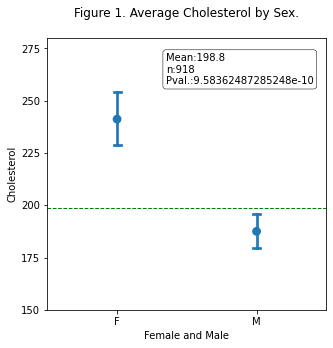

In [ ]:
#ESCOGEMOS LA VARIABLE SEXO Y EL COLESTEROL COMO SUJETO DE ESTUDIO
#Descriptive comparison:
print(heart.groupby('Sex').Cholesterol.mean())

#Statistical comparison:
#Extract the two sub samples and store them in two objects
Cholesterol_female=heart.loc[heart.Sex=='F', "Cholesterol"]
Cholesterol_male=heart.loc[heart.Sex=='M', "Cholesterol"] 

res = stats.f_oneway(Cholesterol_female,Cholesterol_male)
print(res)

#CI meanplot
#Graphic comparison: confidence intervals for the means
plt.figure(figsize=(5,5))
ax = sns.pointplot(x="Sex", y="Cholesterol", data=heart,capsize=0.05, ci=95, join=0, order=['F', 'M'])
ax.set_ylabel('Cholesterol')
plt.yticks(np.arange(150, 280, step=25))
plt.ylim(150,280)
plt.axhline(y=heart.Cholesterol.mean(),linewidth=1,linestyle= 'dashed',color="green")
props = dict(boxstyle='round', facecolor='white', lw=0.5)
# plt.text(1.5, 5000, 'Mean: 4504.3''\n''n: 731' '\n' 'F: 40.06''\n' 'Pval.: 0.000', bbox=props)
plt.text(0.35,258,'Mean:198.8''\n''n:918''\n' 'Pval.:9.58362487285248e-10', bbox=props)
plt.xlabel('Female and Male')
plt.title('Figure 1. Average Cholesterol by Sex.''\n')


#OBSERVAMOS QUE EL PVALUE ES MUY CERCANO AL 0 Y POR TANTO RECHAZAMOS LA HIPOSESIS NULA
#PODEMOS DECIR PUES QUE EL COLESTEROL NO DIFIERE CON LA VARIABLE SEXO
